In [1]:
import requests
import re
import pandas as pd

### Example Texts

In [2]:
text = "Autophagy maintains tumour growth through circulating the great arginine."
text1 = "X-rays were negative and physical assessment determined soft tissue damage to the lateral aspect of her ankle. She was initially treated with ice, an ace wrap, crutches and mild pain medications (Tylenol with codeine)"
text2 = "It is a skin disease causing much itchiness. Scratching leads to redness, swelling, cracking, weeping clear fluid, crusting, and scaling."
text3 = "Maybe its a tumour. Maybe take some tylenol. Don't worry I'm not a doctor. I'm Dave"
texts = [text,text1,text2,text3]

Create Single Text Block from Text That is easily re-separated

In [29]:
coms = pd.DataFrame({'comments':texts}) #create comments df
coms.reset_index(inplace=True)
coms.rename(columns = {"index":"idx"},inplace=True)
coms.idx = coms.idx.astype(str)
coms['comidx'] = coms.idx +': '+coms.comments+'. ::'
coms.comidx = coms.comidx.str.lower().str.replace(r'\(|\)',',',regex=True)
texty = ' '.join(coms.comidx.tolist()); texty

"0: autophagy maintains tumour growth through circulating the great arginine.. :: 1: x-rays were negative and physical assessment determined soft tissue damage to the lateral aspect of her ankle. she was initially treated with ice, an ace wrap, crutches and mild pain medications ,tylenol with codeine,. :: 2: it is a skin disease causing much itchiness. scratching leads to redness, swelling, cracking, weeping clear fluid, crusting, and scaling.. :: 3: maybe its a tumour.  take some tylanol. don't worry i'm not a doctor. i'm dave. ::"

#### Get Start and End Doc Indecies
> Here we'll use regex to find the text indecies of each doc or comment.  This will tell us which doc or comment is teh parent of each biomedical term returned from BERN2

In [30]:
string = texty
pattern = r'(\d:.*?)::'
dfi = pd.DataFrame()
for o in re.findall(pattern,string):
        print(o)
        print()
        match=(re.search(o, string))
        print(match)
                #Getting the start and end index in tuple format using match.span()
        text = o
        start = match.start()
        end = match.end()
        span = match.span()
        dfi = dfi.append({'text':text,'start':start,'end':end,'span':span},ignore_index=True)
        print ("start and end index", match.span())
dfi   

0: autophagy maintains tumour growth through circulating the great arginine.. 

<re.Match object; span=(0, 78), match='0: autophagy maintains tumour growth through circ>
start and end index (0, 78)
1: x-rays were negative and physical assessment determined soft tissue damage to the lateral aspect of her ankle. she was initially treated with ice, an ace wrap, crutches and mild pain medications ,tylenol with codeine,. 

<re.Match object; span=(81, 303), match='1: x-rays were negative and physical assessment d>
start and end index (81, 303)
2: it is a skin disease causing much itchiness. scratching leads to redness, swelling, cracking, weeping clear fluid, crusting, and scaling.. 

<re.Match object; span=(306, 448), match='2: it is a skin disease causing much itchiness. s>
start and end index (306, 448)
3: maybe its a tumour.  take some tylanol. don't worry i'm not a doctor. i'm dave. 

<re.Match object; span=(451, 534), match="3: maybe its a tumour.  take some tylanol. don't >
start and 

,text,start,end,span
0,0: autophagy maintains tumour growth through c...,0.0,78.0,"(0, 78)"
1,1: x-rays were negative and physical assessmen...,81.0,303.0,"(81, 303)"
2,2: it is a skin disease causing much itchiness...,306.0,448.0,"(306, 448)"
3,3: maybe its a tumour. take some tylanol. don...,451.0,534.0,"(451, 534)"


In [31]:
string = texty
pattern = r'(\d:.*?)::'
dfi = pd.DataFrame()
for o in re.findall(pattern,string):
        print(o)
        print()
        match=(re.search(o, string))
        print(match)
                #Getting the start and end index in tuple format using match.span()
        text = o
        start = match.start()
        end = match.end()
        span = match.span()
        dfi = dfi.append({'text':text,'start':start,'end':end,'span':span},ignore_index=True)
        print ("start and end index", match.span())
dfi   

0: autophagy maintains tumour growth through circulating the great arginine.. 

<re.Match object; span=(0, 78), match='0: autophagy maintains tumour growth through circ>
start and end index (0, 78)
1: x-rays were negative and physical assessment determined soft tissue damage to the lateral aspect of her ankle. she was initially treated with ice, an ace wrap, crutches and mild pain medications ,tylenol with codeine,. 

<re.Match object; span=(81, 303), match='1: x-rays were negative and physical assessment d>
start and end index (81, 303)
2: it is a skin disease causing much itchiness. scratching leads to redness, swelling, cracking, weeping clear fluid, crusting, and scaling.. 

<re.Match object; span=(306, 448), match='2: it is a skin disease causing much itchiness. s>
start and end index (306, 448)
3: maybe its a tumour.  take some tylanol. don't worry i'm not a doctor. i'm dave. 

<re.Match object; span=(451, 534), match="3: maybe its a tumour.  take some tylanol. don't >
start and 

,text,start,end,span
0,0: autophagy maintains tumour growth through c...,0.0,78.0,"(0, 78)"
1,1: x-rays were negative and physical assessmen...,81.0,303.0,"(81, 303)"
2,2: it is a skin disease causing much itchiness...,306.0,448.0,"(306, 448)"
3,3: maybe its a tumour. take some tylanol. don...,451.0,534.0,"(451, 534)"


# Send combined text to bern2

### Query Function:
>This function will send our text to bern2 using their API to get the text labeled

In [5]:
def query_plain(text, url="http://bern2.korea.ac.kr/plain"):
    return requests.post(url, json={'text': text}).json()

# if __name__ == '__main__':
#     text = "Autophagy maintains tumour growth through circulating arginine"
#     print(query_plain(text))

In [9]:
# Send it all to Bern2
output = query_plain(texty)

## Add BERN2 Lables to Docs

>We sent all separate text documents as one big text document to bern2.  Now we'll re-separate the labeled text to show which biomedical words were in which documents.

In [11]:
dfa = pd.DataFrame(output['annotations']) #crete dfa for dataframe of Annotaation

# create str_end col as type str
dfa.span = dfa.span.astype(str)
dfa ['str_end'] = dfa.span.str.replace(r".*'end': (\d+)}",r"\1",regex=True)

dfa.str_end = dfa.str_end.astype(int)  # make str end as type str

#add dfi_idx col
dfi.reset_index(inplace=True)
dfi.rename(columns={'index':'dfi_idx'},inplace=True)

for o,m in zip(dfi.index,dfi.span):  #add dfi_idx col to dfa 
    x,y = m #open span tuple
    #write conditions for specific df rows
    conds = (dfa.str_end > x) & (dfa.str_end < y)
    dfa.loc[conds,'dfi_idx'] = o #save the index of the dfi span that fits to dfa

# dfa.merge(dfi, left_on='dfi_idx',right_index=True)
df = dfa.merge(dfi, left_on='dfi_idx',right_on='dfi_idx')
df.head()

,id,is_neural_normalized,mention,obj,prob,span_x,str_end,dfi_idx,text,start,end,span_y
0,[mesh:D009369],False,tumour,disease,0.999996,"{'begin': 23, 'end': 29}",29,0.0,0: autophagy maintains tumour growth through c...,0.0,78.0,"(0, 78)"
1,[mesh:D001120],False,arginine,drug,0.994983,"{'begin': 67, 'end': 75}",75,0.0,0: autophagy maintains tumour growth through c...,0.0,78.0,"(0, 78)"
2,[mesh:D000082],False,tylenol,drug,0.997189,"{'begin': 280, 'end': 287}",287,1.0,1: x-rays were negative and physical assessmen...,81.0,303.0,"(81, 303)"
3,[mesh:D003061],False,codeine,drug,0.946703,"{'begin': 293, 'end': 300}",300,1.0,1: x-rays were negative and physical assessmen...,81.0,303.0,"(81, 303)"
4,[mesh:D012871],False,skin disease,disease,0.999603,"{'begin': 317, 'end': 329}",329,2.0,2: it is a skin disease causing much itchiness...,306.0,448.0,"(306, 448)"


## Output df

In [13]:
df = df[['dfi_idx','mention','obj','text']]; df

,dfi_idx,mention,obj,text
0,0.0,tumour,disease,0: autophagy maintains tumour growth through c...
1,0.0,arginine,drug,0: autophagy maintains tumour growth through c...
2,1.0,tylenol,drug,1: x-rays were negative and physical assessmen...
3,1.0,codeine,drug,1: x-rays were negative and physical assessmen...
4,2.0,skin disease,disease,2: it is a skin disease causing much itchiness...
5,2.0,itchiness,disease,2: it is a skin disease causing much itchiness...
6,2.0,redness,disease,2: it is a skin disease causing much itchiness...
7,2.0,swelling,disease,2: it is a skin disease causing much itchiness...
8,2.0,cracking,disease,2: it is a skin disease causing much itchiness...
9,2.0,crusting,disease,2: it is a skin disease causing much itchiness...


In [23]:
dfwords = df.groupby(['mention']).dfi_idx.count().reset_index().sort_values('dfi_idx',ascending=False); dfwords

,mention,dfi_idx
9,tumour,2
0,arginine,1
1,codeine,1
2,cracking,1
3,crusting,1
4,itchiness,1
5,redness,1
6,scaling,1
7,skin disease,1
8,swelling,1


In [25]:
!pip install seaborn

     |████████████████████████████████| 288 kB 22.5 MB/s eta 0:00:01


[Text(0.5, 0, 'Number of commenters mentioning the term')]

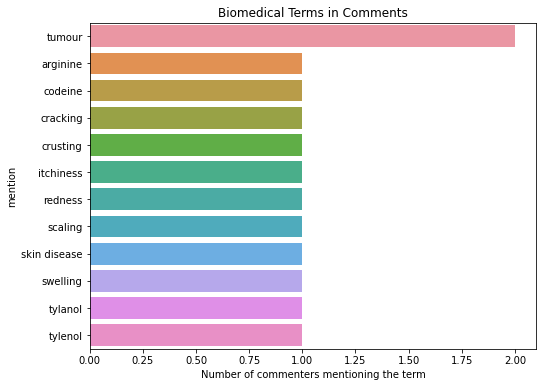

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the width and height of the figure
plt.figure(figsize=(8,6))

# Add title

# Bar chart showing average arrival delay for Spirit Airlines flights by month

ax = sns.barplot(x=dfwords.dfi_idx, y=dfwords.mention)

#title
ax.set_title(f'Biomedical Terms in Comments')

# Add label for  axis
ax.set(xlabel='Number of commenters mentioning the term')